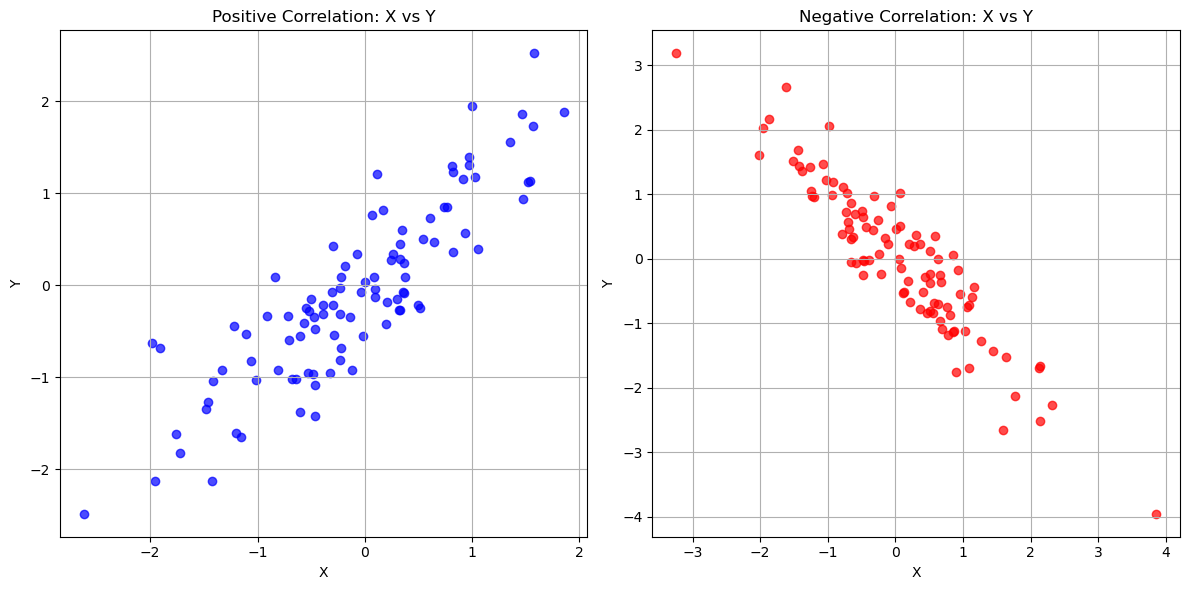

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 양의 상관관계를 가지는 데이터 생성
np.random.seed(42)
X_pos = np.random.normal(0, 1, 100)  # X 값 생성
Y_pos = X_pos + np.random.normal(0, 0.5, 100)  # Y는 X에 일정한 상관관계를 가지도록 생성

# 음의 상관관계를 가지는 데이터 생성
X_neg = np.random.normal(0, 1, 100)  # X 값 생성
Y_neg = -X_neg + np.random.normal(0, 0.5, 100)  # Y는 X와 반대로 상관관계를 가지도록 생성

# 양의 상관관계 산점도
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 두 개의 그래프를 한 화면에 출력하기 위한 설정
plt.scatter(X_pos, Y_pos, color='blue', alpha=0.7)
plt.title('Positive Correlation: X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# 음의 상관관계 산점도
plt.subplot(1, 2, 2)
plt.scatter(X_neg, Y_neg, color='red', alpha=0.7)
plt.title('Negative Correlation: X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.tight_layout()  # 그래프 간격 조정
plt.show()

## SECTION01

In [2]:
import pandas as pd

# 주어진 데이터
data = {
    '키' : [150, 160, 170, 175, 165],
    '몸무게' : [42, 50, 70, 64, 56]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation = df.corr()
print(correlation)

            키       몸무게
키    1.000000  0.919509
몸무게  0.919509  1.000000


In [3]:
print(correlation.iloc[0,1])

0.9195090879163764


In [4]:
print(df['키'].corr(df['몸무게']))
print(df['몸무게'].corr(df['키']))

0.9195090879163765
0.9195090879163765


In [5]:
# 피어슨 상관계수(기본값)
print(df.corr())

# 스피어만 상관계수
print(df.corr(method='spearman'))

# 켄달의 타우 상관계수
print(df.corr(method='kendall'))

            키       몸무게
키    1.000000  0.919509
몸무게  0.919509  1.000000
       키  몸무게
키    1.0  0.9
몸무게  0.9  1.0
       키  몸무게
키    1.0  0.8
몸무게  0.8  1.0


In [7]:
from scipy import stats

# 피어슨 상관계수와 p-value 계산
print(stats.pearsonr(df['몸무게'], df['키']))

# 스피어만 상관계수와 p-value 계산
print(stats.spearmanr(df['몸무게'], df['키']))

# 켄달의 타우 상관계수와 p-value 계산
print(stats.kendalltau(df['몸무게'], df['키']))

PearsonRResult(statistic=0.9195090879163765, pvalue=0.027079456895589476)
SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849874)
SignificanceResult(statistic=0.7999999999999999, pvalue=0.08333333333333333)


## SECTION02

In [8]:
import pandas as pd

data = {
    '키' : [150, 160, 170, 175, 165, 155, 172, 168, 174, 158, 162, 173, 156, 159, 167, 163, 171, 169, 176, 161],
    '몸무게' : [42, 50, 70, 64, 56, 48, 68, 60, 65, 52, 54, 67, 49, 51, 58, 55, 69, 61, 66, 53]
}

df = pd.DataFrame(data)

In [10]:
from statsmodels.formula.api import ols
model = ols('키 ~ 몸무게', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      키   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           4.04e-10
Time:                        09:44:49   Log-Likelihood:                -45.761
No. Observations:                  20   AIC:                             95.52
Df Residuals:                      18   BIC:                             97.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0676      4.158     27.671      0.0

In [11]:
print('결정계수 :', model.rsquared)

결정계수 : 0.8915914350087262


In [12]:
print('기울기 :', model.params['몸무게'])
print('절편 :', model.params['Intercept'])

기울기 : 0.8658438852380215
절편 : 115.0676390447185


In [14]:
print('p-value :', model.pvalues['몸무게'])
print('p-value :', '{:.10f}'.format(model.pvalues['몸무게']))

p-value : 4.0379325599303475e-10
p-value : 0.0000000004


In [16]:
new_data = pd.DataFrame({'몸무게' : [67]})
result = model.predict(new_data)
print('몸무게가 67일 때의 예측 키 :', result[0])

몸무게가 67일 때의 예측 키 : 173.07917935566593


In [17]:
df['잔차'] = df['키'] - model.predict(df)
print('잔차 제곱합 :', sum(df['잔차']**2))

잔차 제곱합 : 113.74226638884441


In [18]:
df['잔차'] = df['키'] - model.predict(df)
MSE = (df['잔차']**2).mean()
print('MSE :', MSE)

MSE : 5.68711331944222


In [19]:
from sklearn.metrics import mean_squared_error
pred = model.predict(df['몸무게'])
mse = mean_squared_error(df['키'], pred)
print('MES :', mse)

MES : 5.68711331944222


In [20]:
print('신뢰구간 :\n', model.conf_int(alpha=0.05).loc['몸무게'])

신뢰구간 :
 0    0.716337
1    1.015351
Name: 몸무게, dtype: float64


In [22]:
new_data = pd.DataFrame({'몸무게' : [50]})
pred = model.get_prediction(new_data)
result = pred.summary_frame(alpha=0.05)
print('예측값의 신뢰구간과 예측구간 :\n', result)

예측값의 신뢰구간과 예측구간 :
          mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  158.359833  0.794986      156.68963     160.030037    152.820798   

   obs_ci_upper  
0    163.898869  


## SECTION03

In [23]:
import pandas as pd

data = {
    '매출액' : [300, 320, 250, 360, 315, 328, 310, 335, 326, 280, 290, 300, 315, 328, 310, 335, 300, 400, 500, 600],
    '광고비' : [70, 75, 30, 80, 72, 77, 70, 82, 70, 80, 68, 90, 72, 77, 70, 82, 40, 20, 75, 80],
    '직원수' : [15, 16, 14, 20, 19, 17, 16, 19, 15, 20, 14, 5, 16, 17, 16, 14, 30, 40, 10, 50]
}

df = pd.DataFrame(data)
print(df.head(3))

   매출액  광고비  직원수
0  300   70   15
1  320   75   16
2  250   30   14


In [24]:
from statsmodels.formula.api import ols
model = ols('매출액 ~ 광고비 + 직원수', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     8.907
Date:                Mon, 18 Nov 2024   Prob (F-statistic):            0.00226
Time:                        11:03:53   Log-Likelihood:                -108.22
No. Observations:                  20   AIC:                             222.4
Df Residuals:                      17   BIC:                             225.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.0239     71.716      1.409      0.1

In [25]:
print('상관계수 :', df['광고비'].corr(df['매출액']))

상관계수 : 0.13316981737040343


In [27]:
from scipy import stats
print(stats.pearsonr(df['광고비'], df['매출액']))

PearsonRResult(statistic=0.13316981737040343, pvalue=0.5756778801904272)


In [28]:
print('결정계수(R-squared) :', model.rsquared)

결정계수(R-squared) : 0.5116964327009044


In [29]:
print('회귀계수 :\n', round(model.params))

회귀계수 :
 Intercept    101.0
광고비            2.0
직원수            6.0
dtype: float64


In [30]:
print('p-value :', model.pvalues['광고비'])

p-value : 0.037643506476960256


In [36]:
new_data = pd.DataFrame({
    '광고비' : [50],
    '직원수' : [20]
})
result = model.predict(new_data)
print('새로운 데이터의 매출액 :', result)
print('새로운 데이터의 매출액 :', result[0])

새로운 데이터의 매출액 : 0    310.57033
dtype: float64
새로운 데이터의 매출액 : 310.5703303181536


In [37]:
df['잔차'] = df['매출액'] - model.predict(df)
print('잔차 제곱합 :', sum(df['잔차']**2))

잔차 제곱합 : 58686.17827156106


In [38]:
print(sum(model.resid**2))

58686.17827156106


In [39]:
MSE = (df['잔차']**2).mean()
print('MSE :', MSE)

MSE : 2934.308913578053


In [40]:
print('95% 신뢰구간 :\n', model.conf_int(alpha=0.05))

95% 신뢰구간 :
                    0           1
Intercept -50.283684  252.331429
광고비         0.116785    3.522069
직원수         2.912406    8.945105


In [42]:
new_data = pd.DataFrame({
    '광고비' : [45],
    '직원수' : [22]
})
pred = model.get_prediction(new_data)
result = pred.summary_frame(alpha=0.05)
print('예측값의 신뢰구간과 예측구간 :\n', result)

예측값의 신뢰구간과 예측구간 :
          mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  313.330707  22.502058     265.855514       360.8059     180.58875   

   obs_ci_upper  
0    446.072663  


## SECTION04

In [43]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv('./data/study.csv')
df.head()

,study_hours,material_type,score
0,71,강의,95
1,34,독학,63
2,91,도서,95
3,80,독학,80
4,40,강의,79


In [44]:
from statsmodels.formula.api import ols
model = ols('score ~ study_hours + material_type', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     991.9
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           4.42e-72
Time:                        15:23:25   Log-Likelihood:                -238.89
No. Observations:                 100   AIC:                             485.8
Df Residuals:                      96   BIC:                             496.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              59.2111    